In [179]:
#initialization
import matplotlib.pyplot as plt
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer, execute
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.ibmq import least_busy

# import basic plot tools
from qiskit.visualization import plot_histogram

In [180]:
n = 4

circuit = QuantumCircuit(n)

In [181]:
def initalize_s(qc, qubits):
    for q in qubits:
        circuit.h(q)

In [182]:
qubits = list(range(n))
initalize_s(circuit, qubits)

In [183]:
circuit.draw()

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ H ├
     ├───┤
q_2: ┤ H ├
     ├───┤
q_3: ┤ H ├
     └───┘

In [184]:
def oracle(n):
    qc = QuantumCircuit(n)
    for i in range(n - 1):
        qc.cz(i, n-1)
    
    ora = qc.to_gate()
    ora.name = "Oracle"
    
    return ora, qc

def multicontrolled_z(n):
    qc = QuantumCircuit(n)
        
    qc.h(n-1)
    qc.mct(list(range(n-1)), n-1)
    qc.h(n-1)

    mz = qc.to_gate()
    mz.name = "MZ"

    return mz

def diffuser(n):
    qc = QuantumCircuit(n)
    for qubit in range(n):
        qc.h(qubit)
        qc.x(qubit)

    qc.append(multicontrolled_z(n), list(range(n)))

    for qubit in range(n):
        qc.x(qubit)
        qc.h(qubit)

    U_s = qc.to_gate()
    U_s.name = "U$_s$"

    qc.draw(output='mpl')

    return U_s, qc

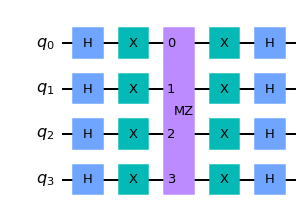

In [185]:
circuit = QuantumCircuit(n)

initalize_s(circuit, qubits)
ora, qc_o = oracle(n)
U_s, qc_u = diffuser(n)
circuit.append(ora, qubits)
circuit.append(U_s, qubits)
circuit.measure_all()

qc_u.draw(output='mpl')

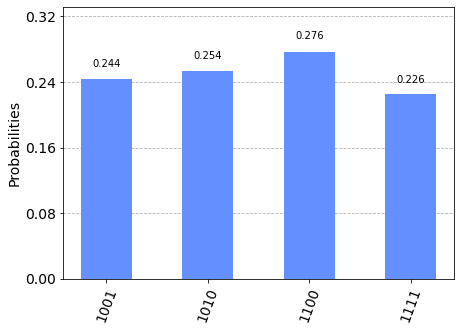

In [186]:
simulator = Aer.get_backend('aer_simulator')
results = execute(circuit, backend=simulator).result()
counts = results.get_counts()
plot_histogram(counts)